<table align="left" width=100%>
    <tr><td width="20%">
            <img src="Great_Learning_Logo.jpeg">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Mini Project - CT2 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## <font color='green'> Group Number:  CT2 Project Group - 5 </font> 

### Team Members

<font color='blue' size=4> 1. Vinod A <br>
2. Ramarajan V <br>
3. Francis Alexandre Akshay Rajan </font> 

Apply **DBSCAN Clustering** for the **Country Status DataSet**. It contains the following data fields: country, child_mort, exports, health,	imports, income,	inflation,	life_expec,	total_fer,	gdpp

Define the Required Libraries for this problem. **(2 marks)**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors as clr
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

Open the CSV file and display the statistical information about the dataset **(1 mark)**

In [2]:
df = pd.read_csv("Country-data.csv")
df.describe(include='all')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
unique,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,NaN,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,NaN,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,NaN,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,NaN,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,NaN,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000


In [3]:
df.drop(columns='country', inplace=True)

#### INFERENCE:   <font color='006600' size=3> &nbsp; As per statistical infromation of the dataframe explains that most of them are normally distributed to each other and defines the SD is good enough for clustering it. But "Country" attribute will not requied as there is no repetation in occurance and not considered as categorical value.<br> Therefore we are removing "Country" attribute, as its not useful for clustering.</font>

Print the correlation map and find the most related features. **(1 mark)**

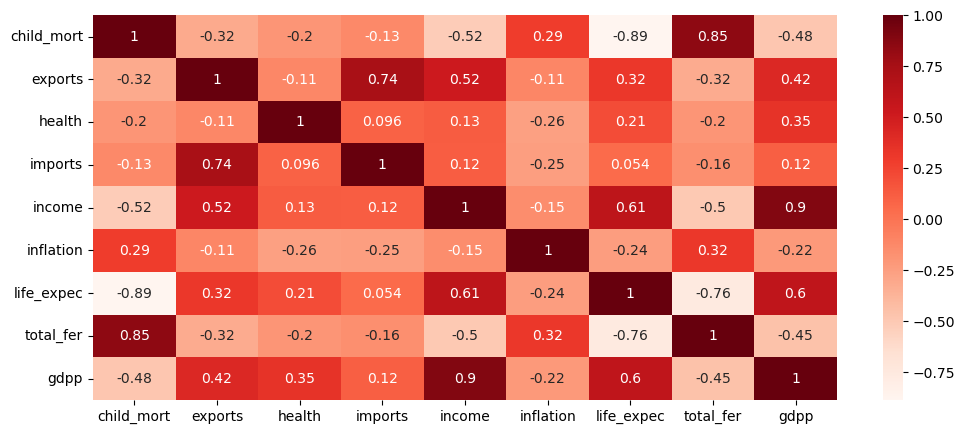

In [4]:
plt.figure(figsize=(12,5))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [5]:
arr = cor.to_numpy()
np.fill_diagonal(arr, 0)
corrFeature = pd.DataFrame(cor[abs(cor) > .8].stack())
corrFeatureIndex = [tuple(set(i)) for i in corrFeature.index]
corrFeature = list(set(corrFeatureIndex))
print("The Top correlated combination of the dataset:")
pd.DataFrame(corrFeature)

The Top correlated combination of the dataset:


,0,1
0,gdpp,income
1,total_fer,child_mort
2,life_expec,child_mort


####  INFERENCE:    <font color='006600' size=3> &nbsp; As per Coorelation matrix we can find that the above mentioned 3 combinations were having more than 80% </font>

Plot a graph with the correlated features. **(1 mark)**

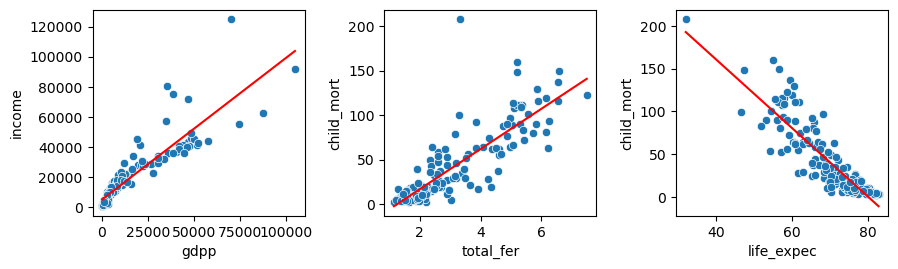

In [6]:
plt.figure(figsize=(12,5))
for i, fe in enumerate(corrFeature):
    x, y = df[fe[0]], df[fe[1]]
    plt.subplot(round(len(corrFeature)/4)+1, 4, i+1)
    sns.scatterplot(x, y)
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
        (np.unique(x)), color='red')
plt.tight_layout()
plt.show()

####  INFERENCE:    <font color='006600' size=3> &nbsp; The Scatter plots were used to represent the corelation and how its been corelated with respect to each other</font>

Apply Elbow Method to find optimal clusters. **(1 marks)**

In [7]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


####  INFERENCE:    <font color='006600' size=3> &nbsp; Before taking a Elbow method or moving into the concept of clustering , we are making the dataset to be scaled with StandardScaler. As this scaling technique scales the values with respect to standard deviation. </font>

In [8]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_scaled)
    Sum_of_squared_distances.append(kmeans.inertia_)
print("Value of k", Sum_of_squared_distances)

Value of k [1502.9999999999998, 1050.2145582853304, 831.4244352086873, 700.3229986404374, 631.387785996057, 550.7126024726136, 517.3769743137748, 453.51612965537197, 428.2024400953263]


Plot Elbow curve **(1 mark)**

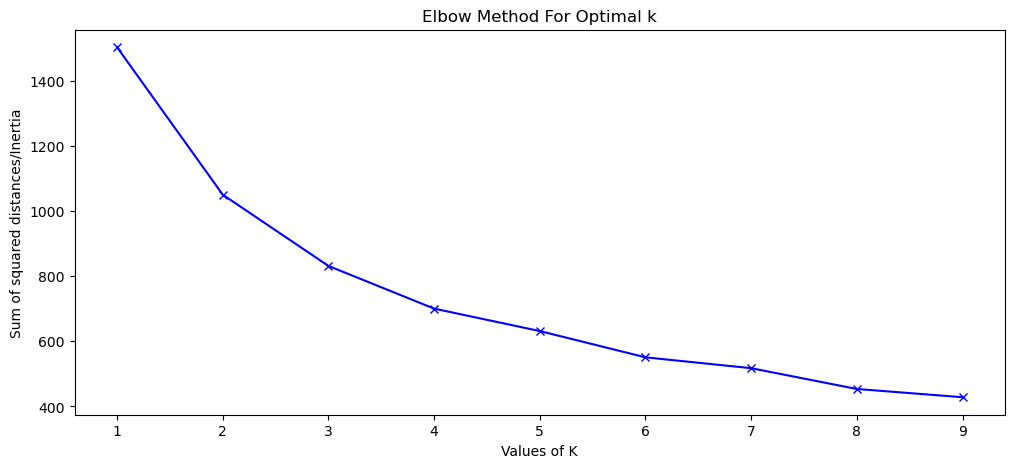

In [9]:
plt.figure(figsize=(12,5))
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

####  INFERENCE:    <font color='006600' size=3> &nbsp; Upon using K-means for calculation the number of clusters in elbow method , it provides the value to K = 3</font>

Apply DBSCAN to find optimal eps and minpts. **(2 marks)**

In [10]:
pca = PCA(n_components = 2)
dim_red_data = pca.fit_transform(df_scaled)


####  INFERENCE:    <font color='006600' size=3> &nbsp; Before Forming cluster with DBSCAN, We are using PCA to reduce the dimension to 2 attributes. </font>

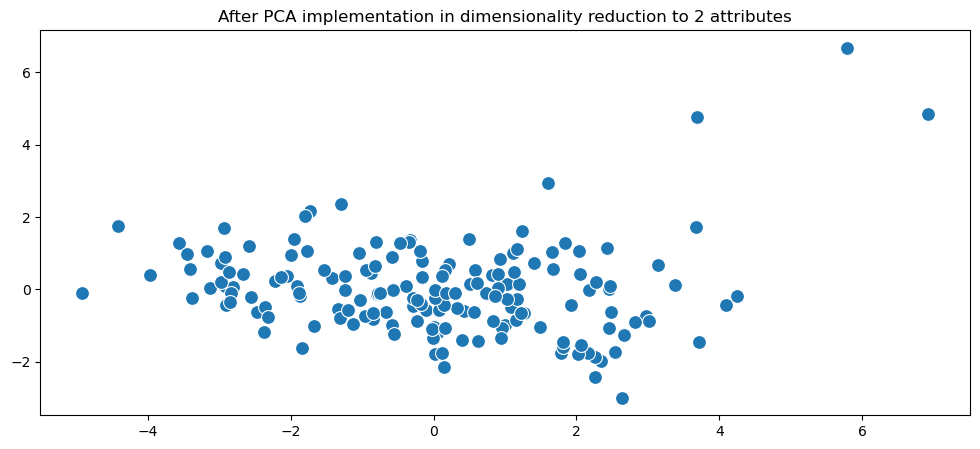

In [11]:

plt.figure(figsize=(12,5))
sns.scatterplot(dim_red_data[:,0], dim_red_data[:,1], s=100)
plt.title("After PCA implementation in dimensionality reduction to 2 attributes")
plt.show()

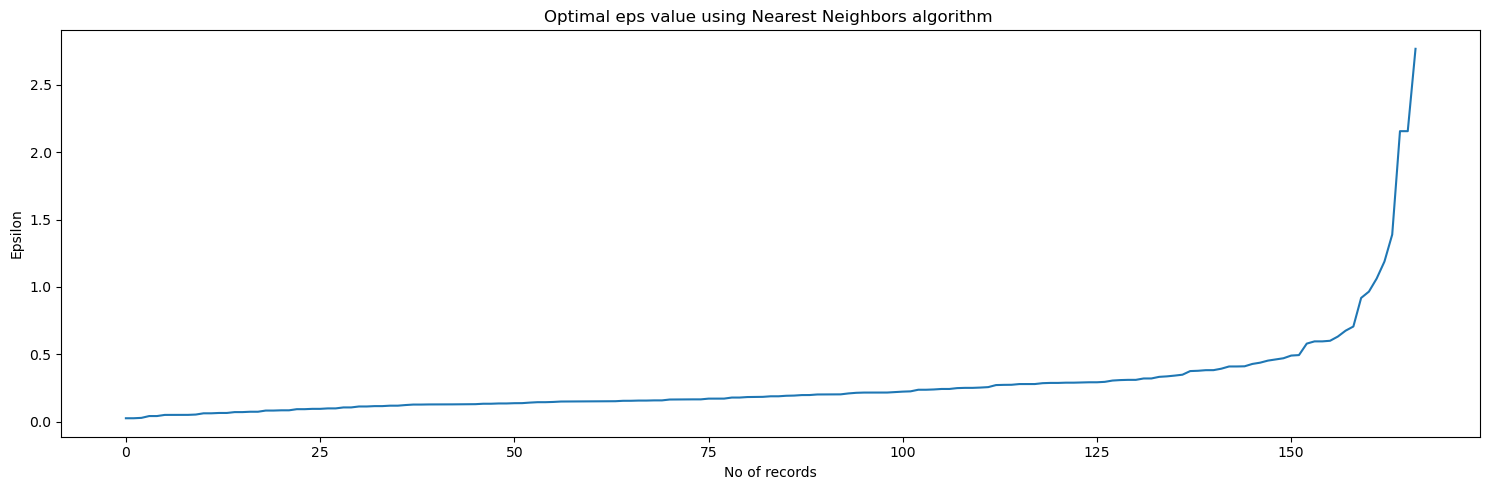

In [12]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(dim_red_data)
distances, indices = neighbors_fit.kneighbors(dim_red_data)
distances = np.sort(distances, axis=0,)
distances = distances[:,1]
plt.figure(figsize=(15, 5))
plt.plot(distances)
plt.title("Optimal eps value using Nearest Neighbors algorithm ")
plt.ylabel("Epsilon")
plt.xlabel("No of records")
plt.tight_layout()
plt.show()

In [13]:
dbscan=DBSCAN(eps=.5, min_samples=7)
dbscan.fit(dim_red_data)
df_scaled['DBSCAN_labels']=dbscan.labels_
df_scaled['DBSCAN_labels'].value_counts()
df_scaled[df_scaled['DBSCAN_labels'] == -1] ='Noise'

####  INFERENCE:     <font color='006600' size=3> &nbsp; To find optimal eps and minpts we are using Nearest Neighbors algorithm. As per graph, we can find the eps value is .35 and taking min_samples as 5 to get 3 clusters </font>

Plot the DBSCAN clustered datapoints using scatter plot. **(1 mark)**

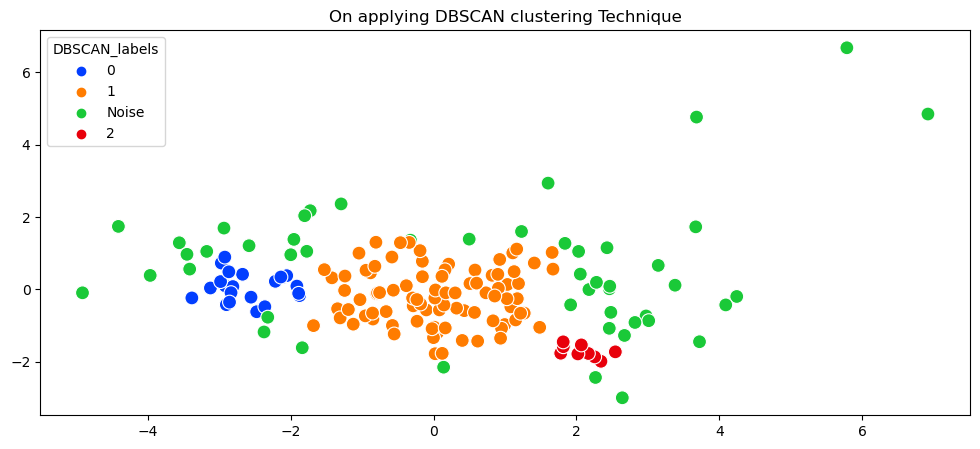

In [14]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=dim_red_data[:,0], y=dim_red_data[:,1],hue=df_scaled.iloc[:,-1], palette='bright', s=100)
plt.title("On applying DBSCAN clustering Technique")
plt.show()

####  INFERENCE:    <font color='006600' size=3> &nbsp; As per DBSCAN results the scatter plots are plotted to exhibit the clustering </font>

Apply **Fuzzy C Means Clustering** for the Country Status DataSet. It contains the following data fields: country, child_mort, exports, health, imports, income, inflation, life_expec, total_fer, gdpp

Define the Required Libraries for this problem. **(2 marks)**

In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from fcmeans import FCM

Open the CSV file and display the statistical information about the dataset **(1 mark)**

In [16]:
df = pd.read_csv("Country-data.csv")
df.describe(include='all')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
unique,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,NaN,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,NaN,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,NaN,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,NaN,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,NaN,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000


####  INFERENCE:    <font color='006600' size=3> &nbsp; As per statistical infromation of the dataframe explains that most of them are normally distributed to each other and defines the SD is good enough for clustering it. </font>

Label encode the country field from the dataset. **(1 mark)**

In [17]:
le = LabelEncoder()
df['country'] = le.fit_transform(df['country'])
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


####  INFERENCE:   <font color='006600' size=3> &nbsp;Label encoding is done for Country attribute and convertied them to numerical values</font>

Print the correlation map and find the most related features. **(1 mark)**

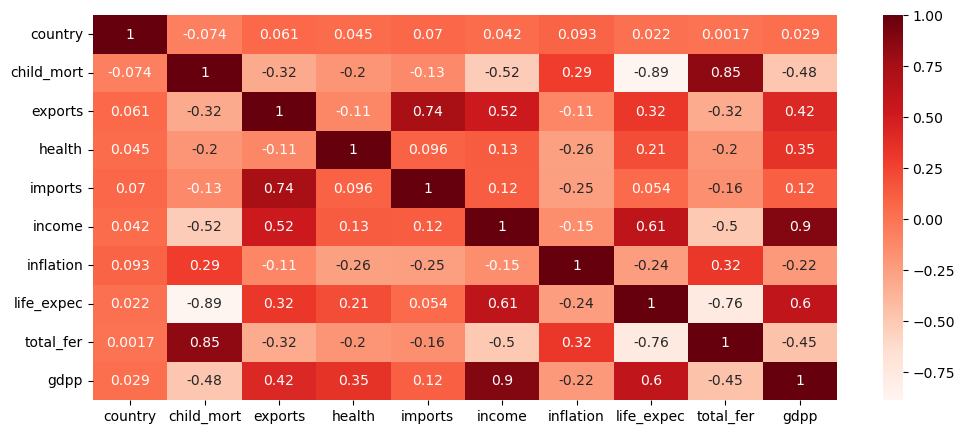

In [18]:
plt.figure(figsize=(12,5))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [19]:
arr = cor.to_numpy()
np.fill_diagonal(arr, 0)
temp = cor[cor.isin([arr.max()])].stack()
print(temp.index[0][0],' vs ',temp.index[0][1],' : ', temp.values[0])

income  vs  gdpp  :  0.895571433087531


####  INFERENCE:    <font color='006600' size=3> &nbsp; As per corelation matrix , we can find "income vs gdpp" has the max corelation</font>

Scaling the dataset. **(1 mark)**

In [20]:
scaler = StandardScaler()

In [21]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

####  INFERENCE:    <font color='006600' size=3> &nbsp; Before taking a Elbow method or moving into the concept of clustering , we are making the dataset to be scaled with StandardScaler. As this scaling technique scales the values with respect to standard deviation. </font>

Apply Fuzzy C-Means Algorithm. **(2 marks)**

In [22]:
# pip install fuzzy-c-means

In [23]:
pca = PCA(n_components = 2)
dim_red_data = pca.fit_transform(df_scaled)
X = dim_red_data

####  INFERENCE:    <font color='006600' size=3> &nbsp; Before Forming cluster with Fuzzy C means, We are using PCA to reduce the dimension to 2 attributes. </font>

In [24]:
from fcmeans import FCM

In [25]:
fcm = FCM(n_clusters=3)
fcm.fit(X)

Merge the predicted label with the dataframe. **(2 marks)**

In [26]:
df['fcm_labels'] = fcm.predict(X)
np.unique(df['fcm_labels'])

array([0, 1, 2])

Plot the Fuzzy C Means clustered datapoints using scatter plot. **(1 mark)**

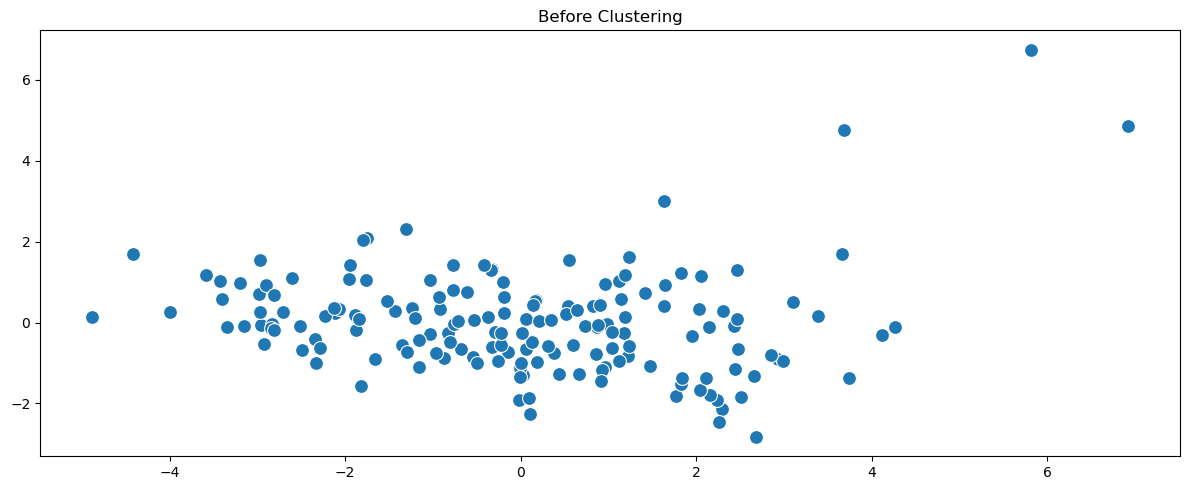

In [27]:
f, axes = plt.subplots(figsize=(12,5))
sns.scatterplot(X[:,0], X[:,1], s=100)
plt.title("Before Clustering")
plt.tight_layout()
plt.show()

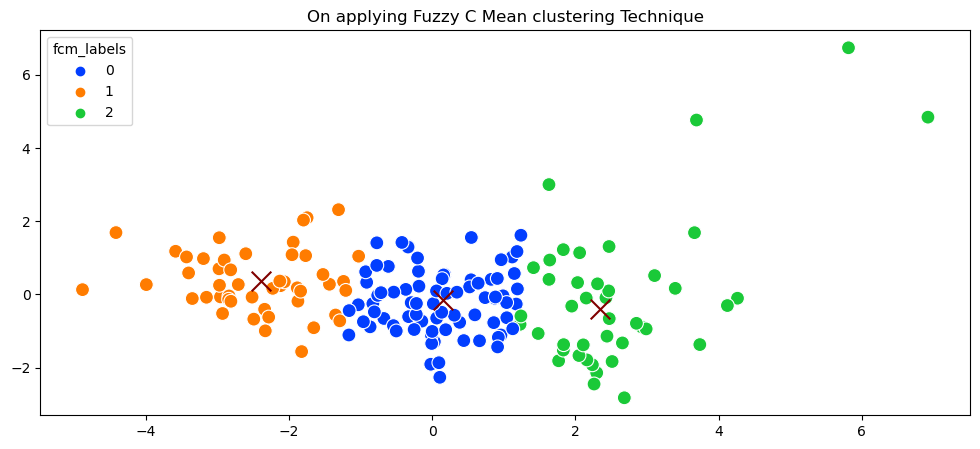

In [28]:
fcm_centers = fcm.centers
f, axes = plt.subplots(figsize=(12,5))
plt.title("On applying Fuzzy C Mean clustering Technique")
sns.scatterplot(X[:,0], X[:,1], hue=df['fcm_labels'], s=100, palette='bright')
plt.scatter(fcm_centers[:,0], fcm_centers[:,1], marker="x", s=200, c='maroon')

####  INFERENCE:    <font color='006600' size=3> &nbsp; As per Fuzzy C means results the scatter plots are plotted to exhibit the clustering </font>